# 1. Different ways to think of vector - Matrix multiplications

## 1a) Matrix `M` * column vector `v` is a weighted sum of columns of `M` where the weights come from the values of `v`

$\begin{bmatrix} 
| & | & | \\
| & | & | \\
c_1 & c_2 & c_3 \\
| & | & | \\
| & | & | \\
\end{bmatrix} \begin{bmatrix} w_1 \\ w_2 \\ w_3 \end{bmatrix} = w_1\begin{bmatrix} | \\ | \\ c_1 \\ | \\ |\end{bmatrix} + w_2\begin{bmatrix} | \\ | \\ c_2 \\ | \\ |\end{bmatrix} + w_3\begin{bmatrix} | \\ | \\ c_3 \\ | \\ |\end{bmatrix}$

In [1]:
import numpy as np
import operator
from PIL import Image
import IPython

In [2]:
def array_scalar_operation(operation, array, scalar):
    return [operation(i, scalar) for i in array]

def elementwise_operation(operation, *args):
    return [operation(i) for i in zip(*args)]

def dot_product(vector1, vector2):
    return sum([v1*v2 for (v1,v2) in zip(vector1, vector2)])

def transpose(array_of_arrays):
    return [[array[i] for array in array_of_arrays] for i in range(len(array_of_arrays[0]))]

cols = [[1,2,3], [4,5,6], [7,8,9], [10,11,12]]
weights = [1,2,3,4]

In [3]:
weighted_cols = [array_scalar_operation(operator.mul, col, weight) for (col, weight) in zip(cols, weights)]
elementwise_operation(sum, *weighted_cols)

[70, 80, 90]

In [4]:
np.asanyarray(cols).T @ weights

array([70, 80, 90])

## 1b)  Row vector `v` * Matrix `M` is a weighted sum of rows of `M` where the weights come from the values of `v`

$\begin{bmatrix} w_1 & w_2 & w_3 \end{bmatrix}
\begin{bmatrix} 
— & — & r_1 & — & — \\
— & — & r_2 & — & — \\
— & — & r_3 & — & — \\
\end{bmatrix} = w_1\begin{bmatrix} 
— & — & r_1 & — & — \end{bmatrix} + w_2\begin{bmatrix} 
— & — & r_2 & — & — \end{bmatrix} + w_3\begin{bmatrix} 
— & — & r_3 & — & — \end{bmatrix} $

In [5]:
rows = [[1,2,3,4], [5,6,7,8], [9,10,11,12]]
weights = [1,2,3]

In [6]:
weighted_rows = [array_scalar_operation(operator.mul, row, weight) for (row, weight) in zip(rows, weights)]
elementwise_operation(sum, *weighted_rows)

[38, 44, 50, 56]

In [7]:
weights @ np.asanyarray(rows)

array([38, 44, 50, 56])

## 2a) Matrix `M` * column vector `v` is a column vector where `value at index i` = `dot product between row i of M and vector v`

$ \begin{bmatrix} 
— & — & r_1 & — & — \\
— & — & r_2 & — & — \\
— & — & r_3 & — & — \\
\end{bmatrix} \begin{bmatrix} w_1 \\ w_2 \\ w_3 \\ w_4 \\ w_5 \end{bmatrix} $ = 
$\begin{bmatrix} <r_1, w> \\ <r_2, w> \\ <r_3, w> \\ \end{bmatrix} $

where $w = \begin{bmatrix} w_1 \\ w_2 \\ w_3 \\ w_4 \\ w_5 \end{bmatrix}$ and $<v_1, v_2>$ is dot product of vectors $v_1$ and $v_2$

In [8]:
cols = [[1,2,3], [4,5,6], [7,8,9], [10,11,12]]
weights = [1,2,3,4]

In [9]:
rows = transpose(cols)
rows

[[1, 4, 7, 10], [2, 5, 8, 11], [3, 6, 9, 12]]

In [10]:
[dot_product(row, weights) for row in rows]

[70, 80, 90]

## 2b) Row vector `v` * Matrix `M` is a row vector where `value at index i` = `dot product between column i of M and vector v`

$\begin{bmatrix} w_1 & w_2 & w_3 & w_4 & w_5 \end{bmatrix}
\begin{bmatrix} 
| & | & | \\
| & | & | \\
c_1 & c_2 & c_3 \\
| & | & | \\
| & | & | \\
\end{bmatrix} = 
\begin{bmatrix} <w, c_1> & <w, c_2> & <w, c_3> \end{bmatrix}
$

where $w = \begin{bmatrix} w_1 & w_2 & w_3 & w_4 & w_5 \end{bmatrix}$ and $<v_1, v_2>$ is dot product of vectors $v_1$ and $v_2$

In [11]:
rows = [[1,2,3,4], [5,6,7,8], [9,10,11,12]]
weights = [1,2,3]

In [12]:
cols = transpose(rows)
cols

[[1, 5, 9], [2, 6, 10], [3, 7, 11], [4, 8, 12]]

In [13]:
[dot_product(weights, col) for col in cols]

[38, 44, 50, 56]

---

# 2. Matrix multiplication

## 2.1 Matrix `A` * Matrix `B` can be seen as:

### 1. An array of column vectors $[c_0, c_1, ...]$ where $c_i = A * $ (column `i` of `B`)

### 2. An array of row vectors $[r_0, r_1, ...]$ where $r_i = $ (row `i` of `A`) $ * B$

A tricky part is to learn to represent a operation as a matrix multiplication (whenever possible - it is possible iff the operation is linear)

## 2.2 Some examples of Matrix multiplications:

### 1. Shuffling elements of an array

$[a,b,c] \rightarrow [b,a,c]$ is the same as:

$\begin{bmatrix} 
0 & 1 & 0 \\ 
1 & 0 & 0 \\
0 & 0 & 1
\end{bmatrix}$ $\begin{bmatrix} 
a \\ 
b \\
c
\end{bmatrix}$ = $\begin{bmatrix} 
b \\ 
a \\
c
\end{bmatrix}$

Such a matrix is called [permutation matrix](https://en.wikipedia.org/wiki/Permutation_matrix).

### 2. Dot product is an output of row vector * column vector
$\begin{bmatrix} 
x & y & z
\end{bmatrix} . \begin{bmatrix} 
a \\ 
b \\
c
\end{bmatrix} = \begin{bmatrix} 
ax + by + cz
\end{bmatrix} = ax + by + cz$

(We will consider a scalar as a matrix with just one row and one column)


## 2.3 We can interpret weighted sum of arrays (columns) geometrically

$\begin{bmatrix}
3 & -2 & 1 \\
2 & 1 & 3
\end{bmatrix} . \begin{bmatrix}
1 \\
3 \\
2
\end{bmatrix} = \begin{bmatrix}
-1 \\
11
\end{bmatrix}$

can be shown geometrically as navigating a certain path in the output space ($R^2$ here):

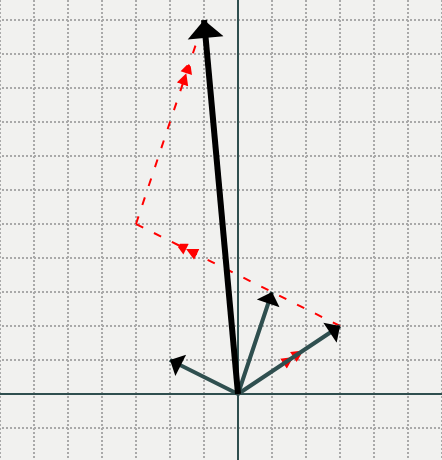

In [14]:
IPython.display.Image('assets/matmul_ex.png')

---

# 3. Basis vectors

You can think of the column vectors of the above matrix as the _basis_ of how to walk in 2D space.

How much to walk in direction of each of the basis vectors is given by the input vector.

This brings us to the next point:

__There can be many matrices of _basis vectors_ to navigate the output space__. Let's look at a few examples:

> 1. Person A: I ran 3 miles everyday and lost 5 pounds in a month <br>
> Person B: How much is that in km and kg?

> 2. You discover a planet where aliens use co-ordinate system differently than us: their `x-axis` is in the direction $\begin{bmatrix} 1 \\ 1 \end{bmatrix}$  and `y-axis` is in the direction $\begin{bmatrix} -3 \\ 2 \end{bmatrix}$. <br>
> Your alien friend tells you their location: $\begin{bmatrix} 5 \\ 4 \end{bmatrix}$. Which point is it in our _normal_(?) co-ordinate system?

### Converting a vector calculated according to one set of basis vectors into another vector calculated using another set (usually the _normal_ set of basis vectors) is called linear transformation

$\begin{bmatrix} \text{km} \\ \text{kg} \end{bmatrix} = \begin{bmatrix} 0.62 & 0 \\ 0 & 2.2 \end{bmatrix} . \begin{bmatrix} \text{mile} \\ \text{pound} \end{bmatrix}$

$\begin{bmatrix} x_{human} \\ y_{human} \end{bmatrix} = \begin{bmatrix} 1 & -3 \\ 1 & 2 \end{bmatrix} . \begin{bmatrix} x_{alien} \\ y_{alien} \end{bmatrix}$

---

# 4. Polynomials are just like vectors (aka polynomials as vector spaces)

$p(x) = a + bx + cx^2 + dx^3$

$q(x) = e + fx + gx^2 + hx^3$

$p = \begin{bmatrix} a \\ b \\ c \\ d  \end{bmatrix}$
$q = \begin{bmatrix} e \\ f \\ g \\ h  \end{bmatrix}$

### You can add two polynomials just like you add two vectors

$p(x) + q(x) = (a+e) + (b+f)x + (c+g)x^2 + (d+h)x^3$

$p = \begin{bmatrix} a+e \\ b+f \\ c+g \\ d+h  \end{bmatrix}$


### You can multiply a scalar with a polynomial just like you multiply a scalar with a vector

$k*p(x) = ka + kbx + kcx^2 + kdx^3$

$kp = \begin{bmatrix} ka \\ kb \\ kc \\ kd  \end{bmatrix}$

## Basis of a polynomial

$\begin{bmatrix} 1 \\ x \\ x^2 \\ x^3  \end{bmatrix}$ is the basis of polynomials $p(x) = a + bx + cx^2 + dx^3$ and $q(x) = e + fx + gx^2 + hx^3$.

But this is not the only basis. Another possible basis is:

$\begin{bmatrix} x^3 \\ x^2(1-x) \\ x(1-x)^2 \\ (1-x)^3 \end{bmatrix}$. 

### Question:

Let p be the point $\begin{bmatrix} a \\ b \\ c \\ d \end{bmatrix}$ according to this basis. What is $p$ in the _normal_(?) basis $\begin{bmatrix} 1 \\ x \\ x^2 \\ x^3  \end{bmatrix}$?

### Solution:

Express $\begin{bmatrix} a & b & c & d \end{bmatrix}$ $\begin{bmatrix} x^3 \\ x^2(1-x) \\ x(1-x)^2 \\ (1-x)^3 \end{bmatrix}$ as $\begin{bmatrix} ? & ? & ? & ? \end{bmatrix}$ $\begin{bmatrix} 1 \\ x \\ x^2 \\ x^3  \end{bmatrix}$.

The tedious way to do it is calculate the dot product and separate the coefficients of $1, x, x^2, x^3$. 

A faster way is to use the relationship between the two basis vectors.

The relationship between the two basis vectors can be shown using a linear transformation as:

$\begin{bmatrix} x^3 \\ x^2(1-x) \\ x(1-x)^2 \\ (1-x)^3 \end{bmatrix}$
= $\begin{bmatrix} 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & -1 \\ 0 & 1 & -2 & 1 \\ 1 & -3 & 3 & -1 \end{bmatrix}$ $\begin{bmatrix} 1 \\ x \\ x^2 \\ x^3  \end{bmatrix}$